In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [8]:
boston=load_boston()

df=pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

C:\Users\prave\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# We see that all the numerical variables are in different scales. Lets observe the effect of different scaling
# techniques on some variables (TAX, AGE, CHAS)

#In practice we usually perform train test split, but y split is not performed in this context as the aim is just to show the
#effect of different scaling techniques

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test=train_test_split(df)

X_train.shape, X_test.shape

((379, 13), (127, 13))

In [80]:
def scaler(scaler,X_train,X_test):
    print(f"BEFORE SCALING: \n{df.describe()}")
#     scaled_df=pd.DataFrame(scaler.fit(df),columns=df.columns)
    scaler.fit(X_train)
    scaled_df=pd.DataFrame(scaler.transform(X_train),columns=df.columns)
    print(f"AFTER SCALING: \n{np.round(scaled_df.describe())}")
    
    fig,(ax1,ax2)=plt.subplots(ncols=2)

    ax1.set_title('Before Scaling')
    sns.kdeplot(df['TAX'],ax=ax1)
    sns.kdeplot(df['AGE'],ax=ax1)
    sns.kdeplot(df['CHAS'],ax=ax1)

    ax2.set_title('After Scaling')
    sns.kdeplot(scaled_df['TAX'],ax=ax2)
    sns.kdeplot(scaled_df['AGE'],ax=ax2)
    sns.kdeplot(scaled_df['CHAS'],ax=ax2)

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer


### Standard Scaler

BEFORE SCALING: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28

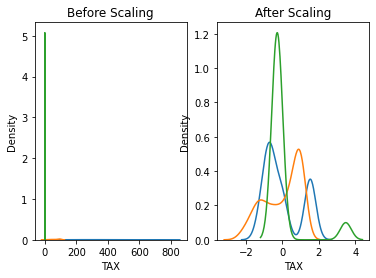

In [82]:
scaler(StandardScaler(),X_train,X_test)

In [91]:
# STANDARDIZATION
# ****************
# Centeres Mean to Zero
# Scales Variance to One
# Value range varies between variables
# Preserves shape of the distribution
# Preserves Outliers

### MinMax Scaler

BEFORE SCALING: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28

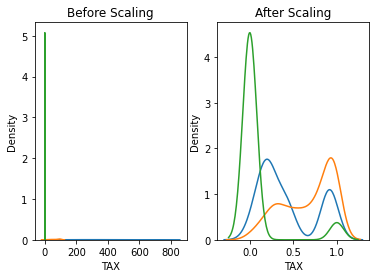

In [83]:
scaler(MinMaxScaler(),X_train,X_test)

In [ ]:
# # MINMAX SCALER
# Mean not centered to zero
# Variance varies between variables
# Variable value range [0,1] 
# Shape of the distribution not preserved
# Outlier sensitive

### MaxAbsolute Scaler

BEFORE SCALING: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28

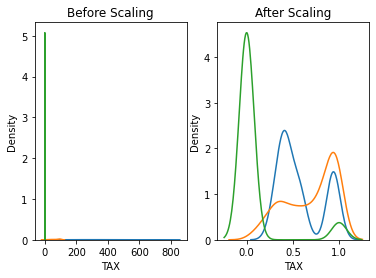

In [84]:
scaler(MaxAbsScaler(),X_train,X_test)

In [ ]:
# MaxAbScaler
#**************
# Doesnt center mean to zero
# Variance between variables vary
# Max value of all variables is set to 1
# Distribution shape is not preserved
# Sensitive outlier

### Robust Scaler

BEFORE SCALING: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28

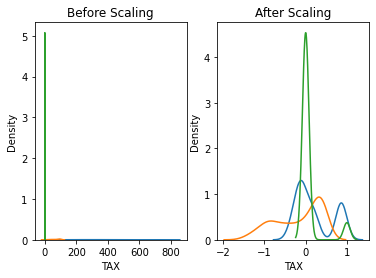

In [85]:
scaler(RobustScaler(),X_train,X_test)

In [ ]:
# # ROBUST SCALER
# ********************
# Doesnt center the median to zero
# Variances between variables vary
# Outliers are ROBUST.
# Shape of the distribution not preserved
# Value range varies between variables

### Scaling to Unit length

BEFORE SCALING: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28

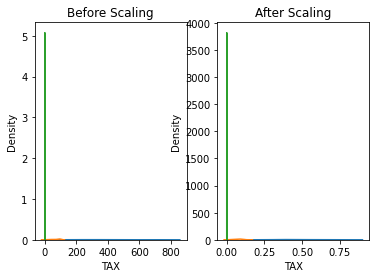

In [93]:
scaler(Normalizer(norm='l1'),X_train,X_test) #Manhattan distance based scaling

#Used mainly in Text classification/ Clustering

BEFORE SCALING: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28

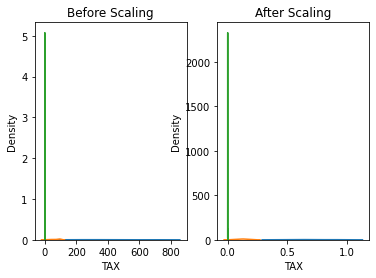

In [87]:
scaler(Normalizer(norm='l2'),X_train,X_test) #Euclidena distance based scaling

### Mean Normalization scaling

BEFORE SCALING: 
        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count  379.0  379.0  379.0  379.0  379.0  379.0  379.0  379.0  379.0  379.0   
mean     4.0   11.0   11.0    0.0    1.0    6.0   69.0    4.0   10.0  411.0   
std      9.0   23.0    7.0    0.0    0.0    1.0   28.0    2.0    9.0  169.0   
min      0.0    0.0    0.0    0.0    0.0    4.0    6.0    1.0    1.0  187.0   
25%      0.0    0.0    5.0    0.0    0.0    6.0   46.0    2.0    4.0  280.0   
50%      0.0    0.0   10.0    0.0    1.0    6.0   78.0    3.0    5.0  334.0   
75%      4.0   12.0   18.0    0.0    1.0    7.0   94.0    5.0   24.0  666.0   
max     89.0  100.0   28.0    1.0    1.0    9.0  100.0   12.0   24.0  711.0   

       PTRATIO      B  LSTAT  
count    379.0  379.0  379.0  
mean      18.0  358.0   13.0  
std        2.0   87.0    7.0  
min       13.0    0.0    2.0  
25%       17.0  375.0    7.0  
50%       19.0  392.0   12.0  
75%       20.0  396.0   17.0  
max       22.0  397.0  

C:\Users\prave\anaconda3\envs\tf2.4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'After Scaling'}, xlabel='TAX', ylabel='Density'>

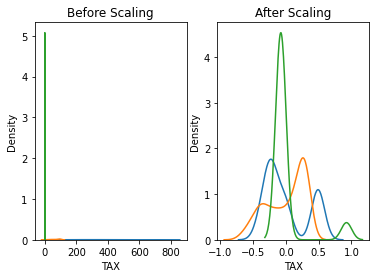

In [92]:
sc=StandardScaler(with_mean=True,with_std=False) #For numerator
rc=RobustScaler(with_scaling=True,with_centering=False,quantile_range=[0,100]) #For denominator

print(f"BEFORE SCALING: \n{np.round(pd.DataFrame(X_train,columns=df.columns).describe())}")

sc.fit(X_train)
rc.fit(X_train)

scaled_df=pd.DataFrame(rc.transform(sc.transform(X_train)),columns=df.columns)

print(f"AFTER SCALING: \n{np.round(scaled_df.describe())}")

fig,(ax1,ax2)=plt.subplots(ncols=2)

ax1.set_title('Before Scaling')
sns.kdeplot(df['TAX'],ax=ax1)
sns.kdeplot(df['AGE'],ax=ax1)
sns.kdeplot(df['CHAS'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(scaled_df['TAX'],ax=ax2)
sns.kdeplot(scaled_df['AGE'],ax=ax2)
sns.kdeplot(scaled_df['CHAS'],ax=ax2)


In [ ]:
# # MEAN NORMALIZATION
# Centers mean to zero
# Variance varies between variables
# Value ranges [-1,1]
# Distribution shape is not preserved
# Outliers are preserved